In [1]:
# adp 15회 ML
# steel.csv 약 1900행 * 27열
# 1개 목표변수(Fault:1~7까지 7개 수준)와 26개 설명변수
# EDA, 상관분석, 분석에 필요한 변수선택(VIF), 파생변수 생성
# - 시각화 및 통계량 제시
# train / validation / test(20%) 분할 후 시각화 및 통계량 제시
# 로지스틱 회귀 분석 후 confusion matrix 확인 + 최적의 cutoff value 정하기
# - 시각화와 통계량 제시
# 로지스틱 회귀 제외하고 SVM 포함 3개의 다항분류 모델 생성 및 결과 해석
# - precision / sensitivity 결과 출력하고 시각화와 통계량 제시
# 위의 총 4개 모형 중에서 가장 적합한 모형 활용하여 군집분석 실시하고 
# 최적의 군집개수 선택 및 클러스터링 수행하여 F1 score 산출
# - 시각화와 통계량 제시


### 그 외 추가 가능한 것
### -> 다항분류 관련된 분석 (adp18-1 문제에서 SOM제외하고 적용해보기)
###    (18회 R 풀이 참조 https://github.com/koni114/ADP/blob/master/ADP%EC%8B%A4%EA%B8%B0%EC%9E%90%EB%A3%8C_18%ED%9A%8C.R)

In [9]:
import pandas as pd

a = pd.read_csv('data/E15Q1_data_raw.csv')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  Steel_Plate_Thickness  1941 non-null   int64  
 12  Edges_Index            1941 non-null   float64
 13  Empty_Index            1941 non-null   float64
 14  Square_Index           1941 non-null   float64
 15  Outs

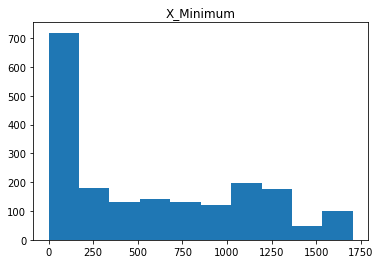

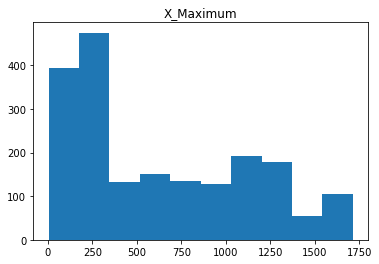

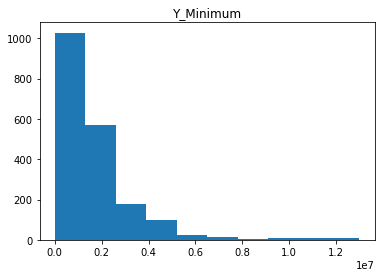

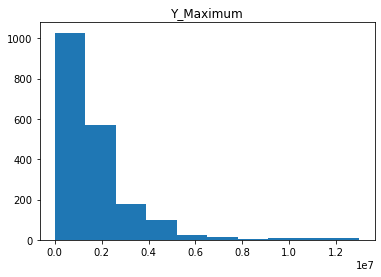

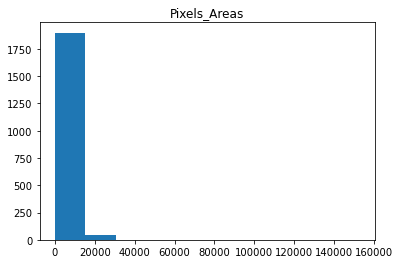

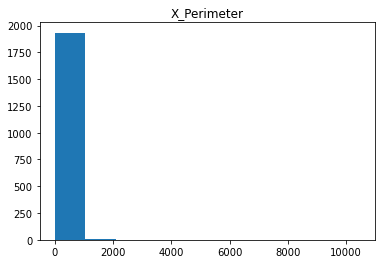

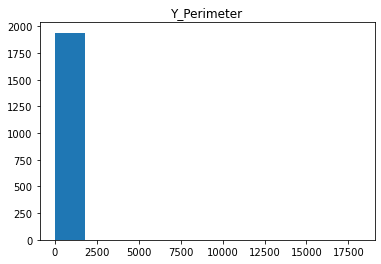

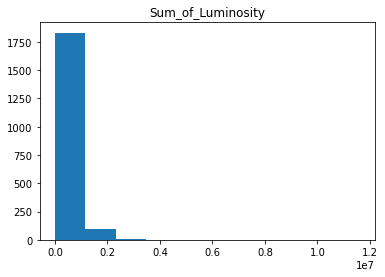

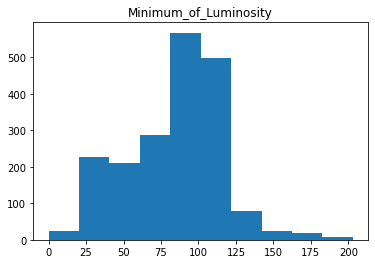

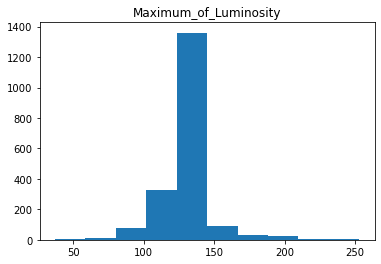

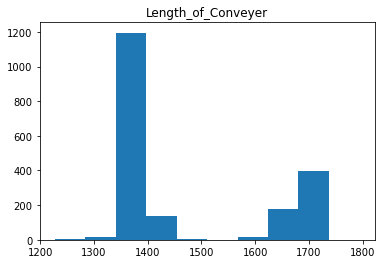

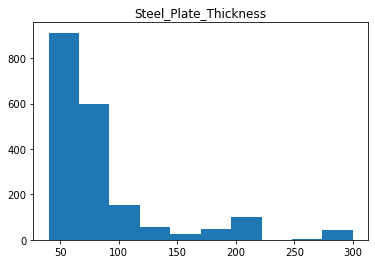

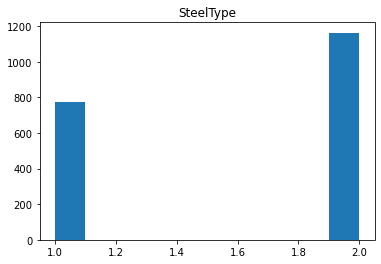

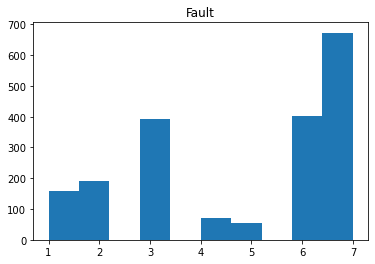

In [10]:
### EDA

import seaborn as sns
import matplotlib.pyplot as plt

for v in a.select_dtypes(include='int'):
    target = a[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

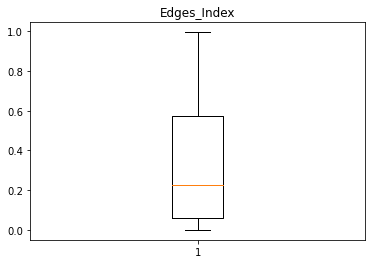

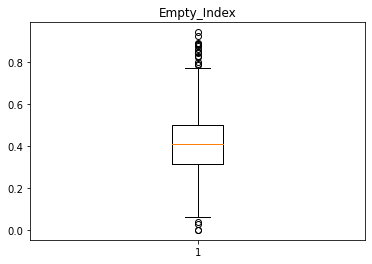

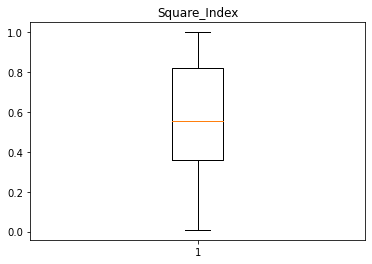

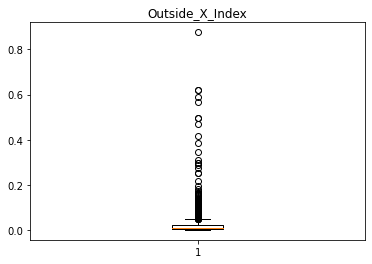

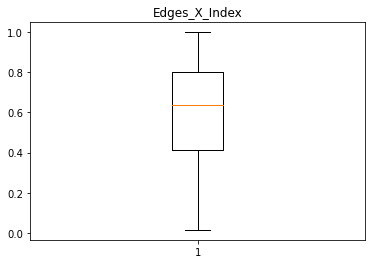

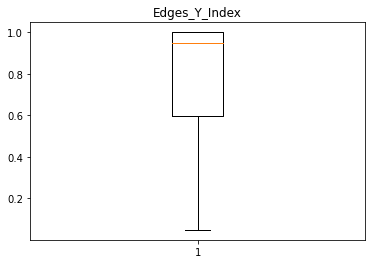

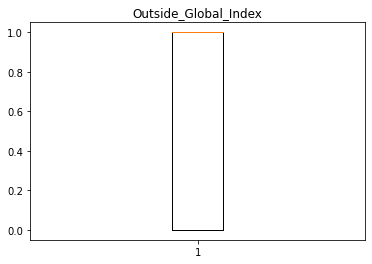

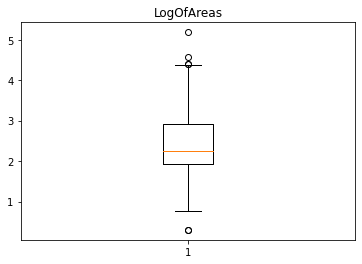

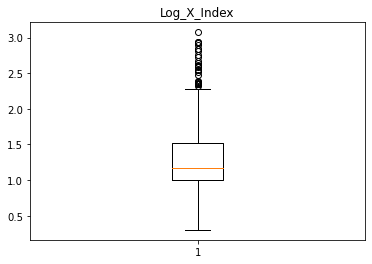

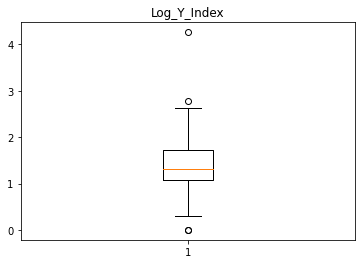

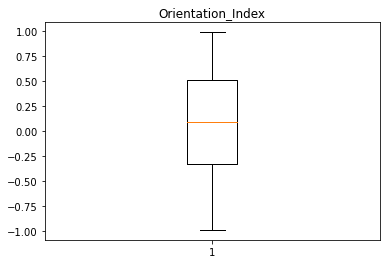

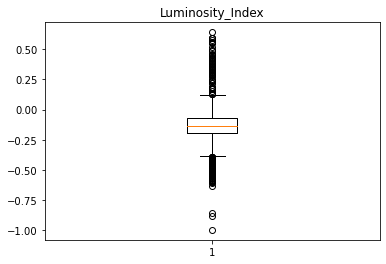

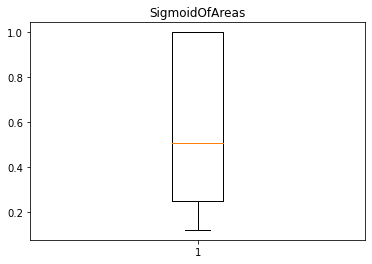

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for v in a.select_dtypes(include='float'):
    target = a[v]
    plt.boxplot(target)
    plt.title(v)
    plt.show()

In [13]:
### 상관분석 

corr = a.corr()
print(corr)

                       X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  \
X_Minimum               1.000000   0.988314   0.041821   0.041807   
X_Maximum               0.988314   1.000000   0.052147   0.052135   
Y_Minimum               0.041821   0.052147   1.000000   1.000000   
Y_Maximum               0.041807   0.052135   1.000000   1.000000   
Pixels_Areas           -0.307322  -0.225399   0.017670   0.017840   
X_Perimeter            -0.258937  -0.186326   0.023843   0.024038   
Y_Perimeter            -0.118757  -0.090138   0.024150   0.024380   
Sum_of_Luminosity      -0.339045  -0.247052   0.007362   0.007499   
Minimum_of_Luminosity   0.237637   0.168649  -0.065703  -0.065733   
Maximum_of_Luminosity  -0.075554  -0.062392  -0.067785  -0.067776   
Length_of_Conveyer      0.316662   0.299390  -0.049211  -0.049219   
Steel_Plate_Thickness   0.136625   0.106119  -0.207640  -0.207644   
Edges_Index             0.278075   0.242846   0.021314   0.021300   
Empty_Index            -0.198461  

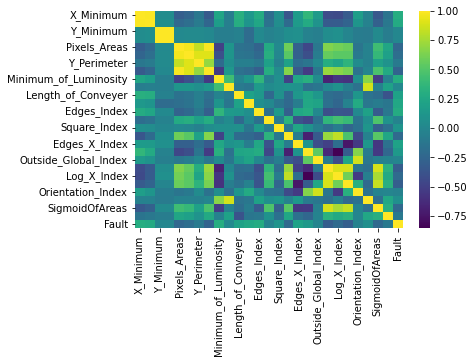

In [14]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [22]:
### 다중공선성 판단 (VIF 수치 확인)
### VIF 수치 10 이상인 변수들 확인

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

a_train = a.drop(['Fault'], axis=1)

def VIF(a_train):
    vif = pd.DataFrame()
    vif['VIF']=[variance_inflation_factor(a_train.values, i) for i in
               range(a_train.shape[1])]
    vif['Feature'] = a_train.columns
    return vif

vif = VIF(a_train)
print(vif)

# 지수표현(e) 안나오는 설정
pd.options.display.float_format = '{:.5f}'.format

                 VIF                Feature
0        85522.70695              X_Minimum
1        90081.45292              X_Maximum
2  31420206770.66928              Y_Minimum
3  31421412466.21756              Y_Maximum
4          518.43216           Pixels_Areas
5          190.60333            X_Perimeter
6         1584.73789            Y_Perimeter
7          399.22714      Sum_of_Luminosity
8           43.44503  Minimum_of_Luminosity
9          177.92411  Maximum_of_Luminosity
10         160.36142     Length_of_Conveyer
11           3.82897  Steel_Plate_Thickness
12           2.94137            Edges_Index
13         237.81406            Empty_Index
14           9.99387           Square_Index
15        1218.16800        Outside_X_Index
16          41.33619          Edges_X_Index
17         109.20423          Edges_Y_Index
18          14.11256   Outside_Global_Index
19       11831.43511             LogOfAreas
20        4058.26752            Log_X_Index
21        3992.14538            

In [ ]:
"""
VIF값 10 이하인 변수들 

11           3.82897  Steel_Plate_Thickness
12           2.94137            Edges_Index
14           9.99387           Square_Index


VIF값 10 언저리
18          14.11256   Outside_Global_Index
23          11.35095       Luminosity_Index
25          16.40441              SteelType

"""


In [30]:
### VIF값 작은 변수들로 다시 VIF값 산출

a_6 = a[['Steel_Plate_Thickness','Edges_Index',
                 'Square_Index','Outside_Global_Index',
                 'Luminosity_Index','SteelType']]

vif = VIF(a_6)
print(vif)

      VIF                Feature
0 2.99604  Steel_Plate_Thickness
1 2.27001            Edges_Index
2 4.09549           Square_Index
3 2.53273   Outside_Global_Index
4 1.74563       Luminosity_Index
5 4.66855              SteelType


In [ ]:
"""
6개 feature의 VIF값이 적정하게 나옴

      VIF                Feature
0 2.99604  Steel_Plate_Thickness
1 2.27001            Edges_Index
2 4.09549           Square_Index
3 2.53273   Outside_Global_Index
4 1.74563       Luminosity_Index
5 4.66855              SteelType

"""

In [39]:
### LDA로 특성 추출 - 26개 변수 모두 사용한 경우
### 분류 모델이므로 클래스 간의 차이를 최대화하는 LDA 수행
### - PCA는 데이터에서 분산이 최대인 성분 축에만 초점을 가지지만
###   LDA는 클래스 간의 차이를 최대화하는 추가적 목적을 가짐

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

features = a_train
target = a['Fault']

# lda 객체 만들고 실행하여 특성 변환
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)


# 특성 개수 출력
print('원본 특성 개수:', features.shape[1])
print('줄어든 특성 개수:', features.shape[1])
print('각 성분이 설명하는 분산의 양', lda.explained_variance_ratio_)


원본 특성 개수: 26
줄어든 특성 개수: 26
각 성분이 설명하는 분산의 양 [0.62161544]


In [34]:
### LDA로 특성 추출 - VIF낮은 6개 변수만 사용한 경우

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

features = a_6
target = a['Fault']

# lda 객체 만들고 실행하여 특성 변환
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)


# 특성 개수 출력
print('원본 특성 개수:', features.shape[1])
print('줄어든 특성 개수:', features.shape[1])
print('각 성분이 설명하는 분산의 양', lda.explained_variance_ratio_)

원본 특성 개수: 6
줄어든 특성 개수: 6
각 성분이 설명하는 분산의 양 [0.57008974]


In [69]:
### 재귀적 특성 제거 방식

from sklearn.feature_selection import RFECV
from sklearn import linear_model

features = a_train

# 선형 회귀모델 
ols = linear_model.LinearRegression()

# 재귀적으로 특성 제거 
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')
rfecv.fit(features, target)
rfecv.transform(features)

# 최선의 특성 개수 - a_train (26개특성) 적용한 경우 3개
#  - a_6 적용한 경우 1로 떠서 사용하지 않음
rfecv.n_features_

3

In [70]:
# 선택된 특성이 표시된 불리언 마스크
rfecv.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False])

In [71]:
"""
26개 변수의 VIF 계산에서 남은 6개 변수와는 다름 
16          41.33619          Edges_X_Index
20        4058.26752            Log_X_Index
21        3992.14538            Log_Y_Index

"""

'\n26개 변수의 VIF 계산에서 남은 6개 변수와는 다름 \n16          41.33619          Edges_X_Index\n20        4058.26752            Log_X_Index\n21        3992.14538            Log_Y_Index\n\n'

<AxesSubplot:>

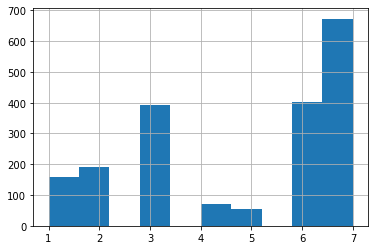

In [87]:
#파생변수 생성

### Fault 의 수준이 1~7로 너무 많으므로 클래스 숫자를 작게 줄이기 

y_7 = a['Fault']
y_7.hist()


In [88]:
y_7 = pd.DataFrame(y_7)

In [90]:
# 구간별로 나누기 

import numpy as np

y = np.digitize(y_7, bins=[3,6], right=True)
y

array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [75]:
"""

### 각 구간에 포함된 샘플 개수가 비슷하도록 구간 분할 (strategy = quantile)
### 위의 히스토그램에서 3개 정도가 적당하다고 생각됨

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(3, encode='onehot-dense', strategy='quantile')
y = kb.fit_transform(y_7)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [91]:
# train / validation / test(20%) 분할 후 시각화 및 통계량 제시

### -> train / test set (20%) 분리 후 train set을 stratrified k-fold 로 재분할


# features 단위가 다르므로 표준화
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(features)


# train / test set 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, random_state=999, test_size=0.2)



In [92]:
# validation set 분할
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
n_iter = 0 

for train_index, test_index in skf.split(X, y):
    # split()으로 반환된 인덱스 이용해 학습용/검증용 테스트 데이터 추출
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
"""
분할된 데이터를 시각화 + 통계량 제시 하는게 어떤건지 모르겠음 

cross_val_score() 로 교차검증 성능 제시 가능한거 아닌가?

"""    

'\n분할된 데이터를 시각화 + 통계량 제시 하는게 어떤건지 모르겠음 \n\ncross_val_score() 로 교차검증 성능 제시 가능한거 아닌가?\n\n'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


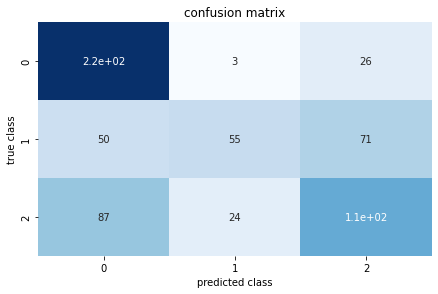

In [103]:
# 로지스틱 회귀 분석 후 confusion matrix 확인 + 최적의 cutoff value 정하기

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### 다중 클래스 로지스틱 회귀
lr = LogisticRegression(random_state=999, multi_class='ovr')


# 모델 훈련 및 예측결과 계산
y_pred = lr.fit(X_train, y_train).predict(X_test)

# confusion matrix
cf = confusion_matrix(y_test, y_pred)

cf_df = pd.DataFrame(cf)

# heatmap
sns.heatmap(cf_df, annot=True, cbar=None, cmap='Blues')
plt.title('confusion matrix'), plt.tight_layout()
plt.ylabel('true class'), plt.xlabel('predicted class')
plt.show()

In [104]:
"""
위의 결과에서 모든셀에 샘플들이 퍼져있으므로 모델 성능이 좋지 않음
완벽한 모델은 대각선에만 값이 있고 나머지는 모두 0

-> cutoff value 변경해야 함
  ROC곡선인지 scipy.optimize.minimize()인지 모르겠음
"""

'\n위의 결과에서 모든셀에 샘플들이 퍼져있으므로 모델 성능이 좋지 않음\n완벽한 모델은 대각선에만 값이 있고 나머지는 모두 0\n\n-> cutoff value 변경해야 함\n  ROC곡선인지 scipy.optimize.minimize()인지 모르겠음\n'

In [100]:
"""

### cutoff value 최적화   
from sklearn.metrics import f1_score
from scipy.optimize import minimize

# 최적화의 목적함수 설정
def f1_opt(x):
    return -f1_score(y_test, y_pred >= x)

# scipy.optimize의  minimize()에서 최적의 임계값 산출
result = minimize(f1_opt, x0=np.array([0.5]), method='Nelder-Mead')
best_threshold = result['x'].item()
best_score = f1_score(y_train, y_pred >= best_threshold)
print(best_threshold, best_score)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [105]:
### ROC곡선
from sklearn.metrics import roc_curve, roc_auc_score

### 예측확률 계산
y_prob = lr.predict_proba(X_test)[:,1]

### 진짜 /거짓 비율 계산
false_poisitive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)

### ROC 곡선 플롯
plt.title('ROC')
plt.plot(false_poisitive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
ptl.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel(true_positive_rate)
plt.xlabel(false_poisitive_rate)
plt.show()


ValueError: multiclass format is not supported

In [106]:
cross_val_score(lr, X_train, y_train, scoring='f1_macro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.29516037, 0.3044805 , 0.56066281, 0.40471402, 0.40802416])

In [ ]:
"""다중 분류 ROC 그리려면 
3개 수준인 y값을 더미변수화 해서 
y1 적용한 경우와 y2 적용한 경우 로 나누고 각각 산출해야 하는건가?

여기까지 온 시간이 12:50  이므로. 
아래의 내용은 풀지 못함

# 로지스틱 회귀 분석 최적의 cutoff value 정하기
# - 시각화와 통계량 제시
# 로지스틱 회귀 제외하고 SVM 포함 3개의 다항분류 모델 생성 및 결과 해석
# - precision / sensitivity 결과 출력하고 시각화와 통계량 제시
# 위의 총 4개 모형 중에서 가장 적합한 모형 활용하여 군집분석 실시하고 
# 최적의 군집개수 선택 및 클러스터링 수행하여 F1 score 산출
"""

In [113]:
# 통계분석 - 비모수적 검정 (파이썬 데이터분석 응용 4문제)

# 1. 정상인 17명 피부생체조직의 아연집중도가 정규분포 따른다고 할수있는지
#   적합도 검정


# Kolmogorov-Smirnov 검정 -> 표본의 분포가 가정한 분포와 적합한지 검정
# https://dschloe.github.io/python/python_edu/05_statistics/chapter_17_1_nonparametric_stat_analysis/
    

from statsmodels.stats.diagnostic import kstest_normal
import numpy as np

t = [437, 358, 72, 32, 107, 223, 60, 72, 54, 35, 70, 20, 34, 24, 24, 51, 23]
t = np.array(t)

kstest_normal(t, dist='norm')

"""
결과 p-value = 0.0009  <0.05 이므로 귀무가설(정규분포 따름) 기각
5% 유의수준에서 정규분포를 따르지 않는다고 할 수 있음
"""

(0.3541969260705717, 0.0009999999999998899)

In [118]:
# 2. 페인트 신규제품(B)이 기존제품(A)보다 빠르게 마르는지 
#  임의추출로 12개씩 추출하여 마르는 시간 조사 
#  t검정과 윌콕슨의 순위합검정 이용하여 신규제품의 성능 개선여부 검토

d = pd.DataFrame({'A':[6.6,5.8,7.8,5.7,6.0,8.4,8.8,8.4,7.3,5.8,5.8,6.5],
                 'B':[6.4,5.8,7.4,5.5,6.3,7.8,8.6,8.2,7.0,4.9,5.9,6.5]})

# wilcoxon 부호-순위 검정은 
# 쌍체 표본 t검정에서 표본수가 30개 미만일 경우 활용

from scipy.stats import wilcoxon
wilcoxon(d['A'],d['B'])
"""
결과 p-value = 0.04122 < 0.05 이므로 귀무가설(A와 B는 차이가 없다) 기각
5% 유의수준에서 신규제품의 마르는 속도는
기존제품과 통계적으로 유의미한 차이가 없다
"""

# t-test 의 경우 

# (1) 등분산 검정
from scipy import stats
stats.bartlett(d['A'],d['B']) 
# 결과 BartlettResult(statistic=0.01596371433615187, pvalue=0.8994567840726932)
# pvalue 0.89 > 0.05 이므로 귀무가설 채택
# -> (등분산성 만족)

# (2) t-test
print(stats.ttest_ind(d['A'],d['B']))
# 결과 Ttest_indResult(statistic=0.4600509078579359, pvalue=0.649994139322092)
# pvalue 0.65 > 0.05 이므로 귀무가설 채택
# -> A와 B의 마르는 시간에는 통계적으로 유의미한 차이가 없다

Ttest_indResult(statistic=0.4600509078579359, pvalue=0.649994139322092)


In [ ]:
# 3. 문제2의 데이터에 대하여 앤사리-브래들리 검정을 이용하여 두 페인트의 
# 건조시간의 분산에 차이가 있는지 검정

### -> ????



In [129]:
# 세그룹 학생들의 시험성적. 일원분류 분산분석과 크러스칼-왈리스 검정

e = pd.DataFrame({'A':[772,764,600,564,500],'B':[792,612,592,600,700],'C':[752,680,624,580,572]})

# ABC를 하나의 특성에 속한 3개의 클래스로 만들어야 함
ee = e.reset_index()

eee = ee.melt(id_vars='index', value_vars=['A','B','C'], 
             var_name='group', value_name='score')
eee

,index,group,score
0,0,A,772
1,1,A,764
2,2,A,600
3,3,A,564
4,4,A,500
5,0,B,792
6,1,B,612
7,2,B,592
8,3,B,600
9,4,B,700


In [131]:
# 분산분석 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('score ~ group', eee).fit()
anova_lm(model)

### 결과 PR(>F) = 0.94127 >0.05 이므로 귀무가설 (그룹간 성적차이 없음) 채택


,df,sum_sq,mean_sq,F,PR(>F)
group,2.00000,1134.93333,567.46667,0.06083,0.94127
Residual,12.00000,111936.00000,9328.00000,NaN,NaN


In [ ]:
""" 참고용 

### 그룹간 유의미한 차이 있는 경우 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(eee.score, eee.group)

# bonferroni correction 으로 검정하는 경우 (모든 집단을 짝지어서 t-test)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

# turkey의 HSD 로 검정하는 경우 (진정으로 유의미한 차이)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(eee['score'], eee['group'], alpha=0.05)
hsd.summary()

### 결과보고 예시 
group에 따른 weight의 평균 차이는 유의미하였다(F(2, 27) = 4.846, p < 0.05)
Tukey의 HSD를 이용하여 사후분석을 실시한 결과, 
trt1 조건과 trt2 조건에서 유의미한 평균 차이가 있었다(p < 0.05).
